<a href="https://colab.research.google.com/github/kobena247/WEBDev/blob/main/DataGroupProject_AyimBoateng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
This program scrapes data from the web and visualizes it
@author: Michael Ayim-Boateng
"""
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re
import requests
from highlight_text import ax_text, fig_text
import squarify

In [ ]:
"""This section creates a dataframe for the data scraped"""

url = 'https://www.computersciencedegreehub.com/best/best-paying-computer-science-jobs/'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')
jobs = [re.sub(r'[\d\s\'.]+','',job.get_text(strip=True)) for job in soup.find_all('h3')]
salaries = [salaries.get_text(strip=True).replace('$','').replace(',','') for salaries in soup.find_all('h4')]

jobTitle = jobs[:len(salaries)]
# Changing the salary values from string to int
salaries = pd.to_numeric(salaries)

# Creating dataframe
data = pd.DataFrame({
    'Job Title': jobTitle,
    'Salary($K)': salaries/1000
})

# Sorting the data and selecting the top N highest paying jobs
topN = 10
sortedData = data.sort_values(by='Salary($K)', ascending=False).head(topN)



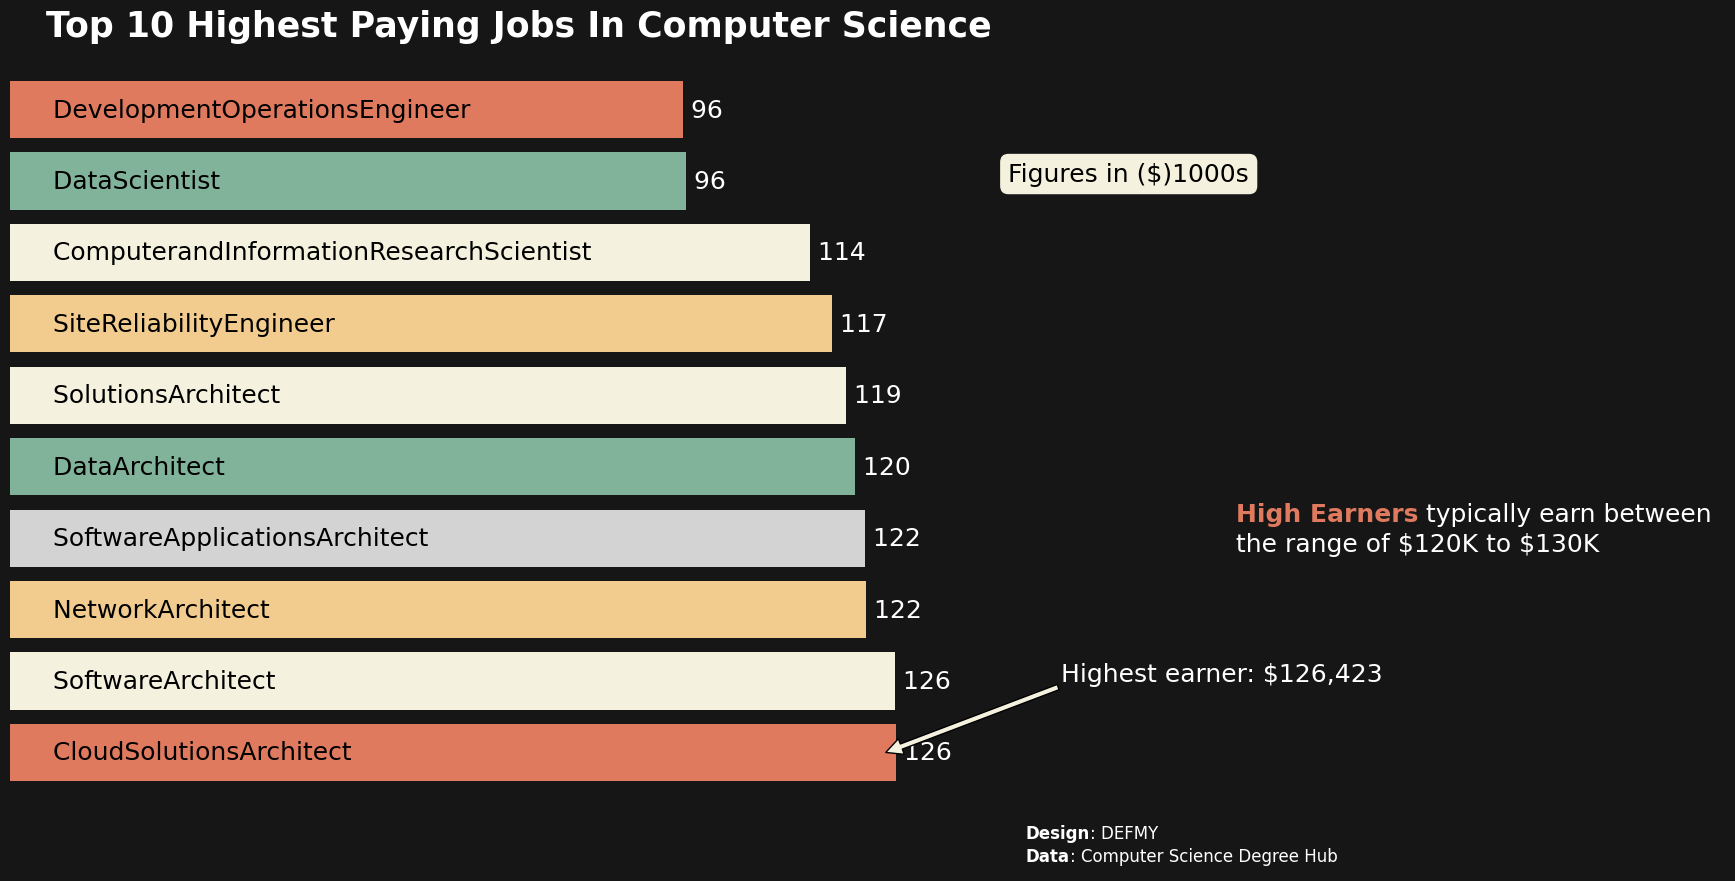

In [190]:
"""This section initializes the figure for the data visualizations"""

fig, ax = plt.subplots(figsize=(12, 10))

# remove axis
ax.axis('off')

# colors for the plot
colors = {
    'CloudSolutionsArchitect': '#e07a5f',
    'SoftwareArchitect': '#f4f1de',
    'NetworkArchitect': '#f2cc8f',
    'SoftwareApplicationsArchitect': 'lightgrey',
    'DataArchitect': '#81b29a',
    'SolutionsArchitect': '#f4f1de',
    'SiteReliabilityEngineer': '#f2cc8f',
    'ComputerandInformationResearchScientist': '#f4f1de',
    'DataScientist': '#81b29a',
    'DevelopmentOperationsEngineer': '#e07a5f'
}
c = [colors[category] for category in sortedData['Job Title']]
backgroundColor = '#161616'
fig.set_facecolor(backgroundColor)
ax.set_facecolor(backgroundColor)
textColor = 'white'


scale_factor = 2.0
scaled_salaries = [salary * scale_factor for salary in sortedData['Salary($K)']]

ax.barh(sortedData['Job Title'], scaled_salaries, color=c)
for i, (title, salary) in enumerate(zip(sortedData['Job Title'], scaled_salaries)):
    if title.startswith('CloudSolutionsArchitect'):
        title = 'CloudSolutionsArchitect'
    elif title.startswith('SoftwareArchitect'):
        title = 'SoftwareArchitect'
    elif title.startswith('NetworkArchitect'):
        title = 'NetworkArchitect'
    elif title.startswith('SoftwareApplicationsArchitect'):
        title = 'SoftwareApplicationsArchitect'
    elif title.startswith('DataArchitect'):
        title = 'DataArchitect'
    elif title.startswith('SolutionsArchitect'):
        title = 'SolutionsArchitect'
    elif title.startswith('SiteReliabilityEngineer'):
        title = 'SiteReliabilityEngineer'
    elif title.startswith('ComputerandInformationResearchScientist'):
        title = 'ComputerandInformationResearchScientist'
    elif title.startswith('DataScientist'):
        title = 'DataScientist'
    elif title.startswith('DevelopmentOperationsEngineer'):
        title = 'DevelopmentOperationsEngineer'

    ax.text(x=10, y=i, s=f' {title}',
            ha='left', va='center', fontsize=18, color='black')
    ax.text(x=salary, y=i, s=f' {int(salary / scale_factor)}',  # Show original salary
            ha='left', va='center', fontsize=18, color=textColor)

title = "Top 10 Highest Paying Jobs In Computer Science"
fig.text(x=0.155, y=0.9, s=title, fontsize=25, ha='left',
         va='center', weight='bold',color=textColor)
plt.text(285, 8, 'Figures in ($)1000s', bbox=dict(facecolor='#f4f1de', edgecolor='#f4f1de', boxstyle='round'), fontsize =18, color='black')

credits = '<Design>: DEFMY \n<Data>: Computer Science Degree Hub'
ax_text(x = 290, y = -1,
        s=credits,
        color=textColor,
        fontsize=12,
        highlight_textprops=[{"fontweight": 'bold'},
                             {"fontweight": 'bold'}], ax = ax)

text = '<High Earners> typically earn between \nthe range of \$120K to \$130K'
ax_text(x=350, y =3.5, s=text, color=textColor, fontsize=18,
        highlight_textprops=[{'color':colors['CloudSolutionsArchitect'],'fontweight':'bold'}])

plt.annotate('Highest earner: $126,423', xy =(250, 0), xytext=(300,1), fontsize= 18,color='white',arrowprops=dict(facecolor='#f4f1de'))

plt.show()

In [ ]:
url = 'https://www.businessinsider.com/best-tech-jobs-for-work-life-balance-2015-10'

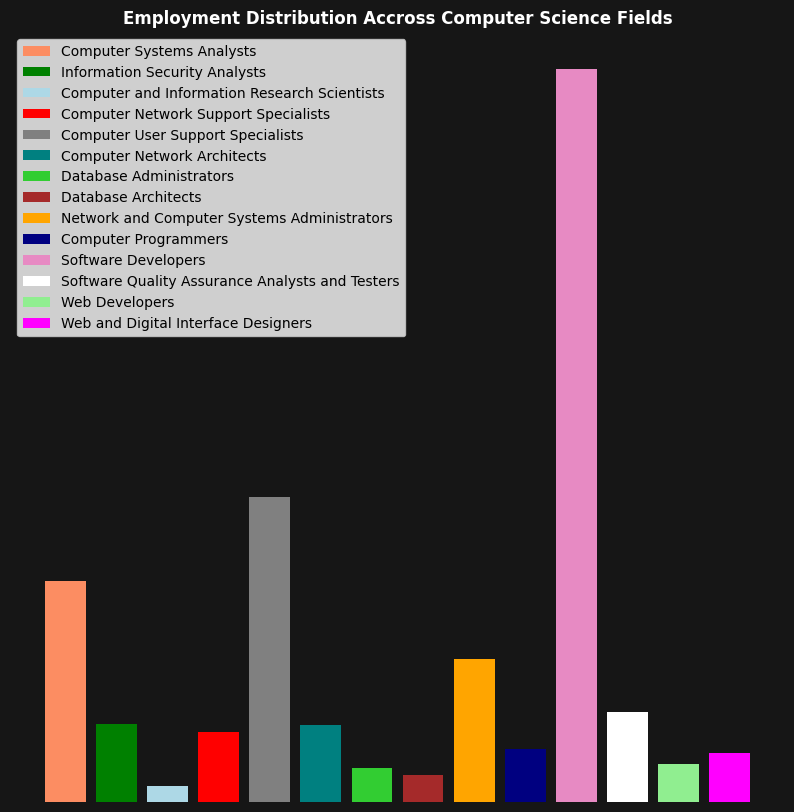

In [211]:
"""This section is for saturation of fields by employment"""

filePath = '/content/drive/MyDrive/Colab Notebooks/jobstat.xlsx'

df = pd.read_excel(filePath)
df = df[['OCC_TITLE','TOT_EMP','O_GROUP']]
df = df.iloc[132:153]
jobs = df[[title == 'detailed' for title in df['O_GROUP']]]

jobTitles = [title for title in jobs['OCC_TITLE'] ]
employmentNums = [num for num in jobs['TOT_EMP']]


fig, ax = plt.subplots(figsize=(10,10))
backgroundColor = '#161616'
fig.set_facecolor(backgroundColor)
ax.set_facecolor(backgroundColor)

ax.axis('off')
colors = ['#fc8d62','green','lightblue','red','grey','teal','limegreen',
 'brown','orange','navy','#e78ac3', 'white','lightgreen', 'magenta']

scale_factor = 2.0
scaled_num = [num * scale_factor for num in employmentNums]

ax.bar(jobTitles, scaled_num, label = jobTitles, color = colors)


text = '<Software Developer> roles comprises of some '
title = 'Employment Distribution Accross Computer Science Fields'

ax.legend(loc='upper left')
plt.title(title, color='white', fontweight='bold')
plt.show()
